In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib.patches import Patch

In [2]:
dfAccident = pd.read_csv('Resources/MoonAccidents.csv')
dfAccident = dfAccident.dropna()
dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase
0,Serious,1.0,04-01-2005,17:42,Third Quarter
1,Light,1.0,04-01-2005,12:30,Third Quarter
2,Light,1.0,04-01-2005,09:28,Third Quarter
3,Light,1.0,04-01-2005,18:48,Third Quarter
4,Light,1.0,04-01-2005,15:45,Third Quarter


In [3]:
#adding year column
dfAccident['Year'] = ''

#for every row, split the date and store the year
for index, row in dfAccident.iterrows():
    date = row['Date']
    year = date.split('-')[2]
    dfAccident.at[index, 'Year'] = year

dfAccident.head()

,Accident_Severity,Number_of_Casualties,Date,Time,Phase,Year
0,Serious,1.0,04-01-2005,17:42,Third Quarter,2005
1,Light,1.0,04-01-2005,12:30,Third Quarter,2005
2,Light,1.0,04-01-2005,09:28,Third Quarter,2005
3,Light,1.0,04-01-2005,18:48,Third Quarter,2005
4,Light,1.0,04-01-2005,15:45,Third Quarter,2005


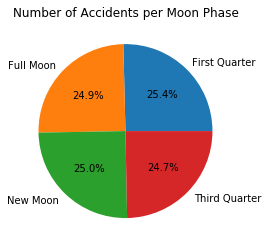

In [82]:
#group by phase and print
gPhases = dfAccident.groupby('Phase')

plt.pie(gPhases['Date'].count(), labels = gPhases.count().index, autopct='%1.1f%%')
plt.title('Number of Accidents per Moon Phase')
plt.savefig('Images/PhaseAccidents')
plt.show()

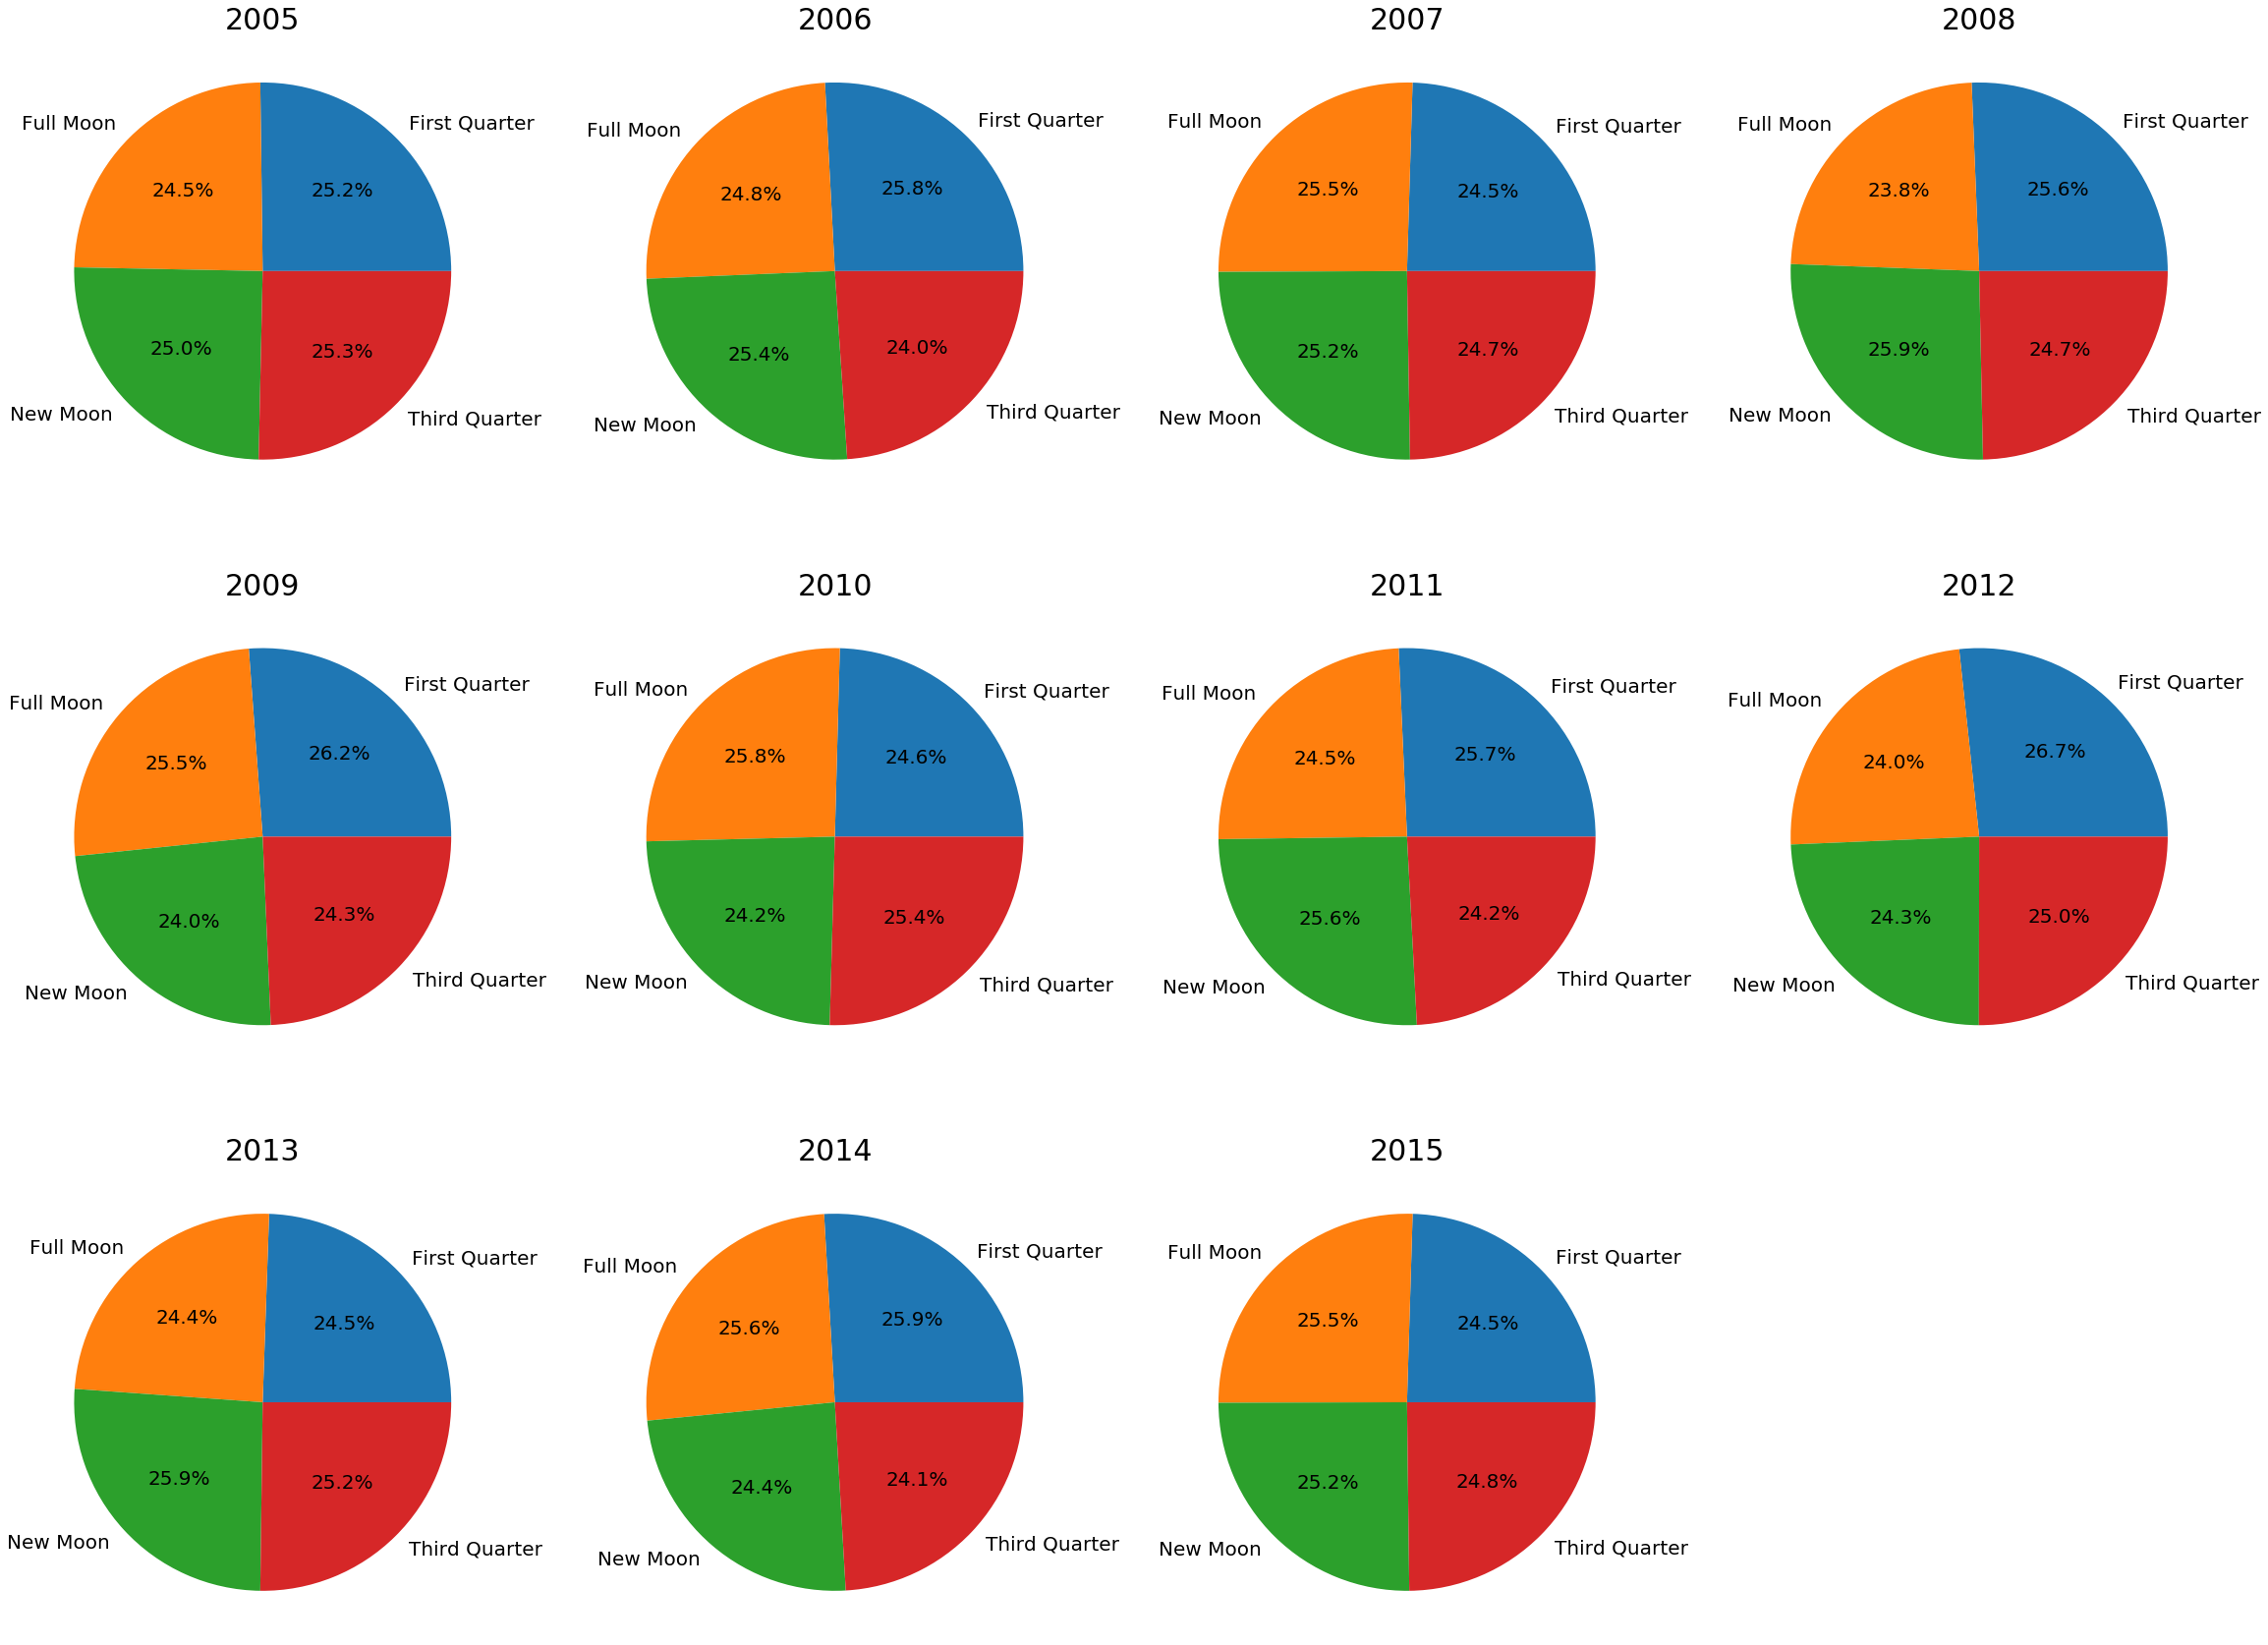

In [83]:
years = dfAccident['Year'].unique()
fig, axs = plt.subplots(3,4, squeeze = False, figsize=(40,30))
#for every year print out the ratio of accidents based on phase
i = 0
for year in years:
    dfYear = dfAccident.query('Year == @year')
    gPhase = dfYear.groupby('Phase')
    axs[int(i / 4), i % 4].pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%', textprops={'fontsize': 20})
    axs[int(i / 4), i % 4].set_title(year, fontsize = 30)
    i = i + 1
    
fig.delaxes(axs.flatten()[11])
plt.savefig('Images/YearlyPhaseAccidents')

plt.show()

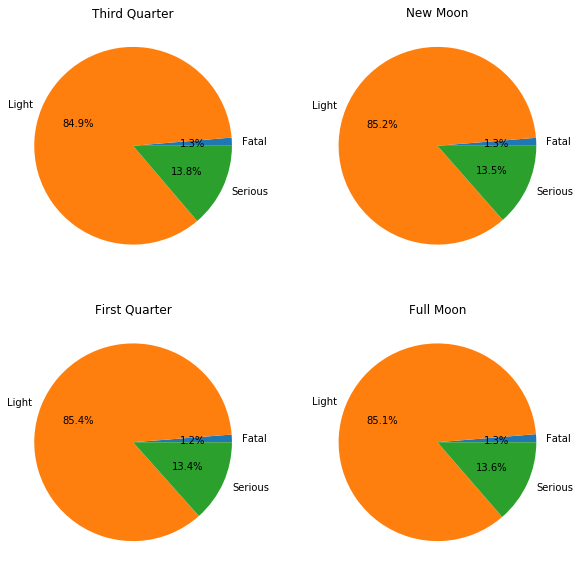

In [84]:
phases = dfAccident['Phase'].unique()
fig, axs = plt.subplots(2,2, squeeze = False, figsize=(10,10))
#comparing phase with accident severity
i = 0
for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    gPhase = dfPhase.groupby('Accident_Severity')
    axs[int(i / 2), i % 2].pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    axs[int(i / 2), i % 2].set_title(phase)
    i = i + 1
    
plt.savefig('Images/PhaseAccidentSeverity')
plt.show()

In [7]:
#converting the number of casualties column to an int and then
#converting all values of above 4 into 4
dfAccident['Number_of_Casualties'] = dfAccident['Number_of_Casualties'].astype(int)
dfAccident.loc[dfAccident['Number_of_Casualties'] > 3, 'Number_of_Casualties'] = 4

#now going through and converting all of those into a string so i can append a +
# to the end of 4 to signify the correct value of the slice
dfAccident['Number_of_Casualties'] = dfAccident['Number_of_Casualties'].astype(str)
dfAccident.loc[dfAccident['Number_of_Casualties'] == "4", 'Number_of_Casualties'] = '4+'

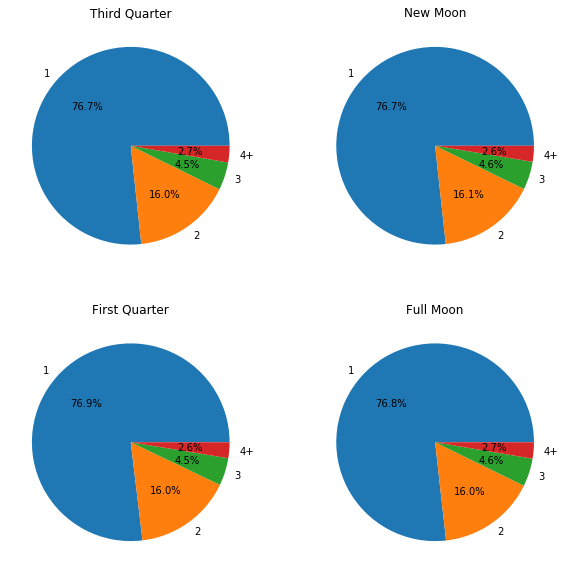

In [85]:
#comparing the number of people involved based on moon phase
phases = dfAccident['Phase'].unique()
fig, axs = plt.subplots(2,2, squeeze = False, figsize=(10,10))
i = 0
for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    gPhase = dfPhase.groupby('Number_of_Casualties')
    axs[int(i / 2), i % 2].pie(gPhase['Date'].count(), labels = gPhase.count().index, autopct='%1.1f%%')
    axs[int(i / 2), i % 2].set_title(phase)
    i = i + 1
plt.savefig('Images/PhaseCasualties')
plt.show()

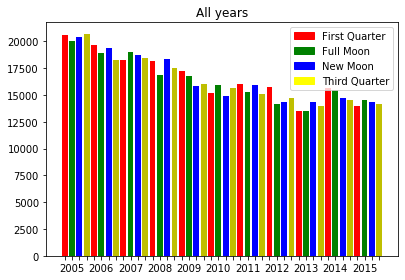

In [9]:
labels = []
for year in years:
    dfYear = dfAccident.query('Year == @year')
    phaseCounts = dfYear['Phase'].value_counts().sort_index()
    phaseOrder = dfYear['Phase'].unique()
    plt.bar(height = phaseCounts, x = (phaseOrder + year), color = ['r', 'g', 'b', 'y'])
    #super ghetto
    labels.append('')
    labels.append(year)
    labels.append('')
    labels.append('')

legend_elements = [Patch(facecolor='red', edgecolor='red',label='First Quarter'),
                   Patch(facecolor='green', edgecolor='green',label='Full Moon'),
                   Patch(facecolor='blue', edgecolor='blue',label='New Moon'),
                   Patch(facecolor='yellow', edgecolor='yellow',label='Third Quarter')]
    
plt.legend(handles = legend_elements)
test = range(len(years) *4)
plt.title('All years')
plt.tight_layout()
plt.xticks(test, labels = labels)
plt.show()

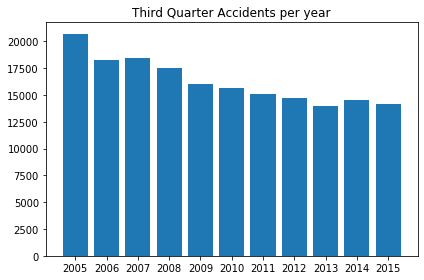

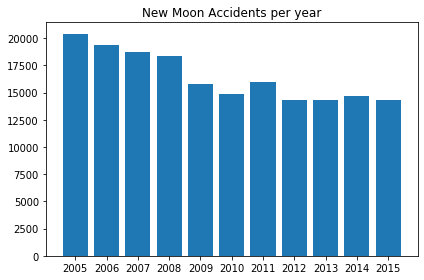

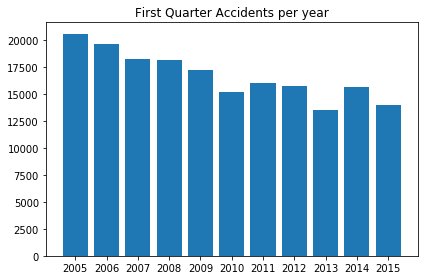

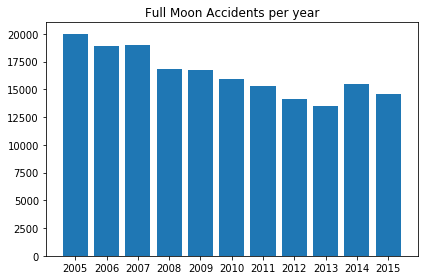

In [108]:
labels = []

for phase in phases:
    dfPhase = dfAccident.query('Phase == @phase')
    phaseCount = dfPhase['Year'].value_counts().sort_index()
    phaseOrder = dfPhase['Year'].unique()
    plt.bar(height = phaseCount, x = phaseOrder)
    plt.title(f'{phase} Accidents per year')
    plt.tight_layout()
    plt.savefig(f'Images/{phase} Accidents')
    plt.show()



In [10]:
dfNonMoon = pd.read_csv('Resources/TotalAccidents_NonMoonPhase.csv')

dfNonMoon.head()

,Date,Total_Accidents
0,01-01-2005,308
1,01-01-2007,335
2,01-01-2009,244
3,01-01-2011,204
4,01-01-2013,262


In [11]:
#Stripping out the year from date and adding a year column
dfNonMoon['Year'] = 0
for index, row in dfNonMoon.iterrows():
    date = row['Date']
    year = date.split('-')[2]
    dfNonMoon.at[index, 'Year'] = year
    
dfNonMoon.head()

,Date,Total_Accidents,Year
0,01-01-2005,308,2005
1,01-01-2007,335,2007
2,01-01-2009,244,2009
3,01-01-2011,204,2011
4,01-01-2013,262,2013


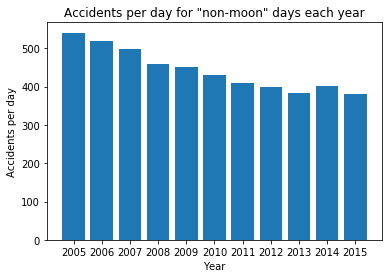

In [109]:
#For each year we calculate accidents per day
average = []
for year in years:
    dfYear = dfNonMoon.query('Year == @year')
    total = dfYear['Total_Accidents'].sum()
    average.append(total / len(dfYear['Year']))
    
plt.title('Accidents per day for "non-moon" days each year')
plt.xlabel('Year')
plt.ylabel('Accidents per day')
plt.bar(height = average, x = (years))
plt.savefig(f'Images/NonMoonAccidentsPerDay')

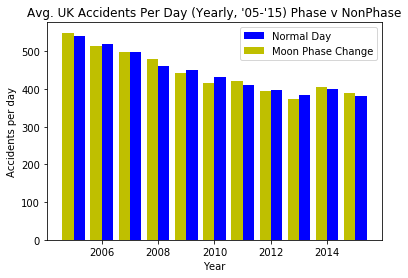

In [111]:
yearsMoon = dfAccident['Year'].unique()
phases = dfAccident['Phase'].unique()
averageMoon = []

#getting number of total accidents for a year and dividing by the number of days
for year in yearsMoon:
    dfYear = dfAccident.query('Year == @year')
    total = len(dfYear)
    averageMoon.append(total / len(dfYear['Date'].unique()))

#using these to shift the bar graphs a little to fit better
yearsFloatMoon = [(float(year) - 0.2) for year in yearsMoon]
yearsFloatNo = [(float(year) + 0.2) for year in years]

plt.bar(height = average, x = yearsFloatNo , width = 0.4, color = 'b', label = 'Normal Day')
plt.bar(height = averageMoon, x =  yearsFloatMoon, width = 0.4, color = 'y', label = 'Moon Phase Change')

plt.legend()
plt.xlabel('Year')
plt.ylabel("Accidents per day")
plt.title("Avg. UK Accidents Per Day (Yearly, '05-'15) Phase v NonPhase")
plt.savefig('Images/AccidentsYearlyCompareBar')
plt.show()

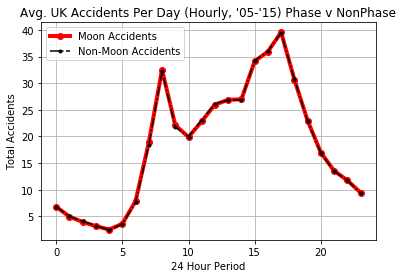

In [110]:
dfHourly = dfAccident.copy()

moondays = len(dfHourly['Date'].unique()) #get total moon phase days 2005-2015
nonmoondays = len(dfNonMoon['Date'].unique()) #get total non moon phase days

dfNonMoonHourly = pd.read_csv('Resources/TimeOfNonMoonPhaseAccidents.csv')
nonmoon_accidents = dfNonMoonHourly['Time'] / nonmoondays

dfHourly['Hour'] = pd.to_datetime(dfHourly['Time'], format='%H:%M').dt.hour
dfHourly_group = dfHourly.groupby(['Hour'])

dfTotalHours = dfHourly_group.count()
accidents = dfTotalHours['Phase'] / moondays #Phase is actually count of accidents as well

hours = np.arange(0, 24, 1)

moon_scatter, = plt.plot(hours, accidents, marker='o', color='red', label='Moon Accidents', linewidth = 4)
nonmoon_scatter, = plt.plot(hours, nonmoon_accidents, marker='.', color='k', label='Non-Moon Accidents', linestyle = '-.')

plt.title("Avg. UK Accidents Per Day (Hourly, '05-'15) Phase v NonPhase")
plt.xlabel('24 Hour Period')
plt.ylabel('Total Accidents')
plt.legend()
plt.grid()
plt.savefig('Images/PhaseVNonPhaseAccidents')
plt.show()

In [117]:
#nabbing our critical value
nat20 = stats.chi2.ppf(q = 0.95, df = 2)

In [126]:
#our critical value again
print(nat20)

stats.chisquare(averageMoon, average)
#our sample of moon days is basically identical to the population

5.991464547107979


Power_divergenceResult(statistic=2.4156990972269257, pvalue=0.9920480652554976)